#### Task
다음 영상을 그 안의 객체를 알아보기 쉬운 영상으로 만들어라.

In [20]:
import cv2
import numpy as np

image = cv2.imread('../data/i2992288637s.png', cv2.IMREAD_COLOR).astype(np.float32)/255
grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

cv2.imshow('color', image)
cv2.imshow('grayscale', grey)
cv2.waitKey()
cv2.destroyAllWindows()

#### (1) 밝기를 n 배 하기

전반적으로 매우 어두운 영상이므로 밝기를 n배 하여 키운다.

In [67]:
import cv2
import numpy as np

image = cv2.imread('../data/i2992288637s.png', cv2.IMREAD_COLOR).astype(np.float32)/255
grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# R,G,B 각 채널의 값을 모두 10씩 키워준다.
image_f = image * 10
grey_f = grey * 10

cv2.imshow('x10 color', image_f)
cv2.imshow('x10 grayscale', grey_f)
cv2.waitKey()
cv2.destroyAllWindows()

#### (2) 화면 밝기를 stretch 하기
보통 (0,1) 사이의 값으로 정규화(Normalize)

In [68]:
import cv2
import numpy as np
#큰값이 하나라도 존재하면 나머지 것들이 살아나지 못함 (화로만 너무 밝음) 10배 하는 것보다 못함
image = cv2.imread('../data/i2992288637s.png', cv2.IMREAD_COLOR).astype(np.float32)/255
grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

grey_norm = cv2.normalize(grey, None, 0, 1, cv2.NORM_MINMAX)

cv2.imshow('cv2.normalize()', grey_norm)
cv2.waitKey()
cv2.destroyAllWindows()

컬러 채널을 통합적으로 정규화

In [69]:
image_norm = cv2.normalize(image, None, 0, 1, cv2.NORM_MINMAX)

cv2.imshow('cv2.normalize()', image_norm)
cv2.waitKey()
cv2.destroyAllWindows()

컬러 채널을 분리해서 정규화

In [70]:
b,g,r = cv2.split(image)

b_norm = cv2.normalize(b, None, 0, 1, cv2.NORM_MINMAX)
g_norm = cv2.normalize(g, None, 0, 1, cv2.NORM_MINMAX)
r_norm = cv2.normalize(r, None, 0, 1, cv2.NORM_MINMAX)

image_norm = cv2.merge([b_norm,g_norm,r_norm])

cv2.imshow('cv2.normalize()', image_norm)
cv2.waitKey()
cv2.destroyAllWindows()

#### (3) plt.hist() 메서드를 이용해서 히스토그램 그리기
>plt.hist() 메서드는 `1차원 배열`의 히스토그램을 출력한다. 주의: 영상을 `1차원 배열로 변형`시켜서 입력해야만 한다.
>
>ravel(), reshape(-1), flatten() 함수는 모두 1차원 배열로 변환하는 함수이다. 
>
>flatten() 함수는 새로운 배열로 복사하여 반환하고, 나머지 두 함수는 데이터의 변형없이 형상만 변경해서 반환한다.

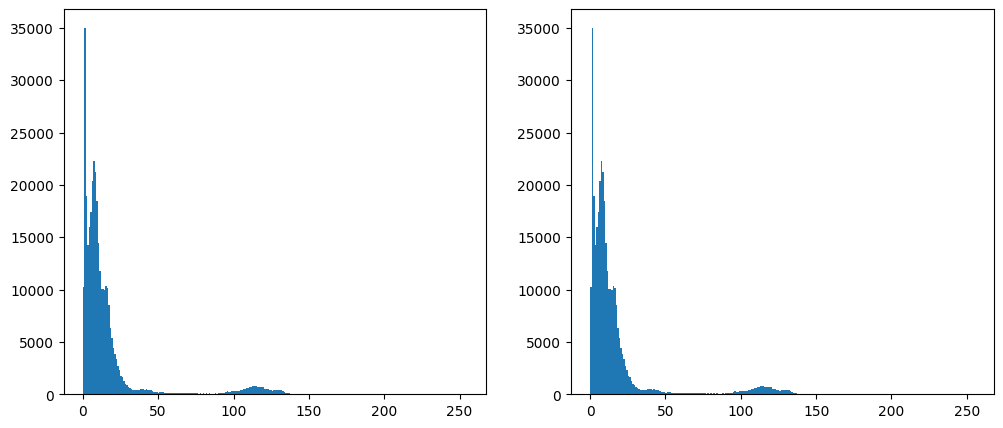

In [25]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# uint8 타입에서 처리
grey = cv2.imread('../data/i2992288637s.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.hist(grey.reshape(-1),256,[0,255]) #1차원 array로 만들어야 함
plt.subplot(122)
plt.hist(grey.ravel(),256,[0,255]) #opencv, numpy, matplotlib에 hist함수가 있음
plt.show()

#노말라이즈해도 전체적으로 밝기를 2배하는 것밖에 안됨
#부분을 나눠서 처리를 달리하자

#### (4) cv2.calcHist() 메서드를 이용해서 히스토그램 구하기
히스토그램 데이터를 저장하려면 np.histogram()이나 cv2.calcHist() 함수를 호출한다.

In [29]:
import cv2
import numpy as np
import matplotlib.pylab as plt

hist = cv2.calcHist([grey], [0], None, [256], [0, 255]) #이미지, 채널번호, 256개의 구간(빈)으로 나눔, 0~255까지 표현

print(hist.dtype, hist.shape)

float32 (256, 1)


> plt.plot() vs plt.fill()

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.fill(hist) # hist[0] = 0으로 세팅하면 잘나옴,하지만 hist[0]의 값을 잃음
plt.title('fill()')
plt.subplot(122)
plt.plot(hist)
plt.title('plot()')
plt.show()

> cv2.calcHist()로 컬러 영상의 채널별 히스토그램 구하기

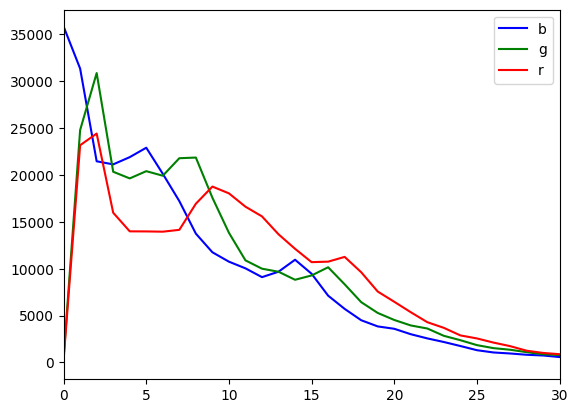

In [42]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('../data/i2992288637s.png')

color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr, color = col, label=col)
    plt.xlim([0,30]) # [0,256] bin 중에서 [0,50] bin 만 보이기
plt.legend()
plt.show()

> cv2.calcHist()를 이용해서 ROI 히스토그램 구하기

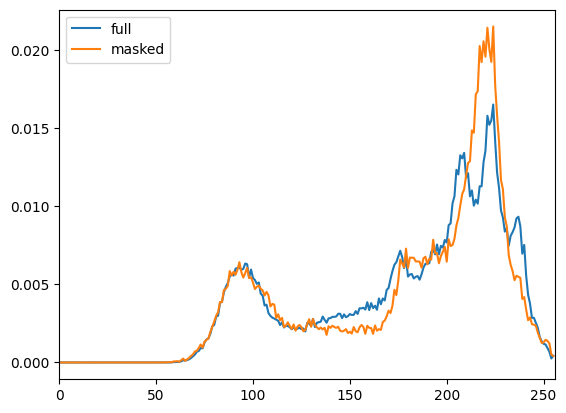

In [43]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('../data/lena.png')

mask = np.zeros(image.shape[:2], dtype=np.uint8) #2차원 배열 생성
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(image, image, mask=mask)

hist_full = cv2.calcHist([image],[2],None,[256],[0,256]) # R channel
hist_mask = cv2.calcHist([image],[2],mask,[256],[0,256]) # R channel, 마스크 지정가능

cv2.imshow('grey', np.hstack([image, masked_img]))
cv2.waitKey()
cv2.destroyAllWindows()

plt.plot(hist_full/np.sum(hist_full),label='full')   # relative frequency(확률)로 변환
plt.plot(hist_mask/np.sum(hist_mask),label='masked') # relative frequency로 변환
plt.legend()
plt.xlim([0,256])
plt.show()

#### (5) np.histogram() 를 이용해서 히스토그램 구하기
np.histogram()은 주어진 데이터 전체에 대한 히스토그램을 작성한다.

채널별 히스토그램을 구하려면, 채널 영상을 입력해야 한다.

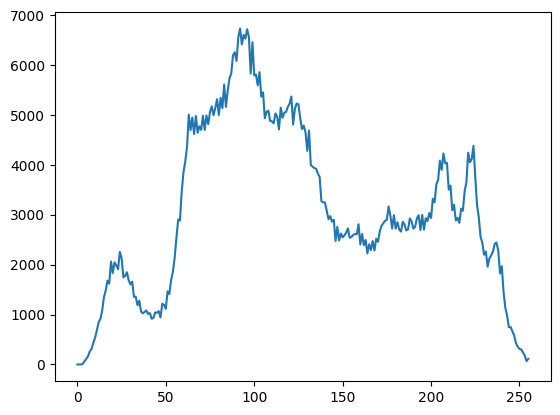

In [44]:
import cv2
import numpy as np
import matplotlib.pylab as plt

image = cv2.imread('../data/lena.png', cv2.IMREAD_COLOR)

hist, bins = np.histogram(image.ravel(), 256, [0, 256]) #1차원 배열, 256개의 빈

plt.plot(hist)
# plt.fill(hist)
plt.show()

(256,) <class 'numpy.ndarray'>


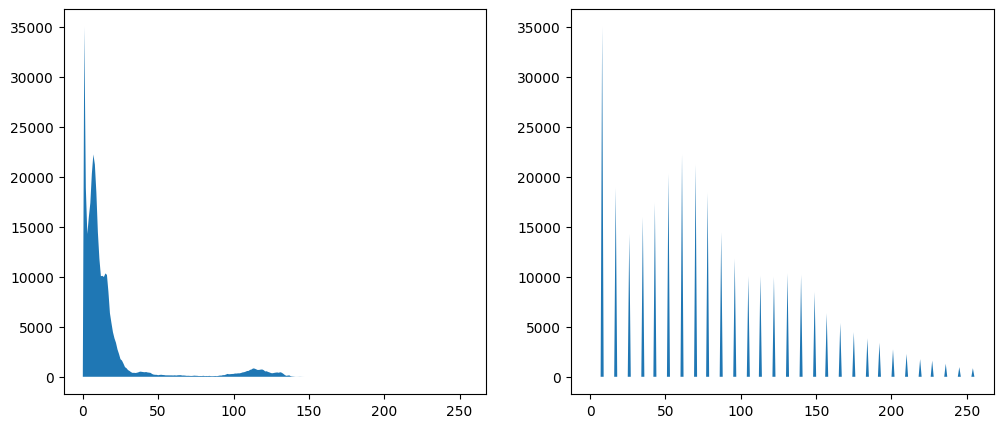

In [13]:
print(hist.shape, type(hist))
hist[0] = 0
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.fill(hist)
plt.subplot(122)
plt.fill(hist_norm)
plt.show()

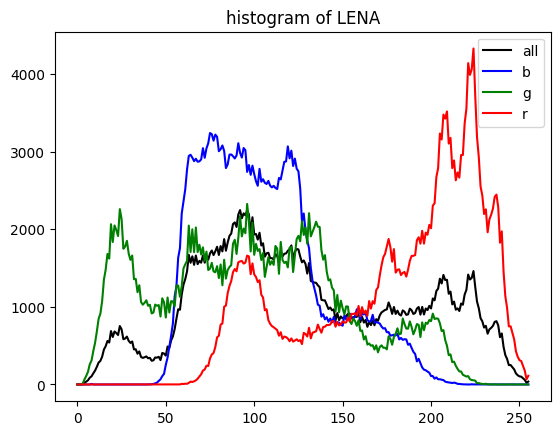

In [47]:
plt.plot(hist/3, color='k', label='all')

color = ('b','g','r')
for i, col in enumerate(color):
    histr, _ = np.histogram(image[..., i],256,[0,256])
    plt.plot(histr, color=col, label=col)

plt.title('histogram of LENA') 
plt.legend()
plt.show()

#### (6) 히스토그램 활용

1) Entropy of image

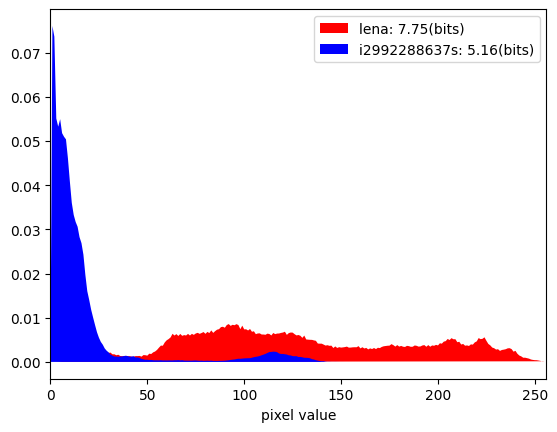

In [48]:
#정보량 -> 픽셀당 정보량을 가지는 데 많이 안나올수록 엔트로피가 높아짐
img1 = cv2.imread('../data/lena.png') #  lena
img2 = cv2.imread('../data/i2992288637s.png') #  osman-rana-unsplash

hist1,_ = np.histogram(img1,256,[0,256])
hist2,_ = np.histogram(img2,256,[0,256])

hist1 = hist1/np.sum(hist1) # pdf
hist2 = hist2/np.sum(hist2) # pdf

# entropy of the image
H1 = np.sum(hist1[hist1>0]*np.log2(hist1[hist1>0])) * -1
H2 = np.sum(hist2[hist2>0]*np.log2(hist2[hist2>0])) * -1

hist1[0]=0
hist2[0]=0
plt.fill(hist1,'r',label='lena: {:0.2f}(bits)'.format(H1))
plt.fill(hist2,'b',label='i2992288637s: {:0.2f}(bits)'.format(H2))
plt.legend()
plt.xlim([0,256])
plt.xlabel('pixel value')
plt.show()



#### (7) Grayscale 영상의 히스토그램 평활화

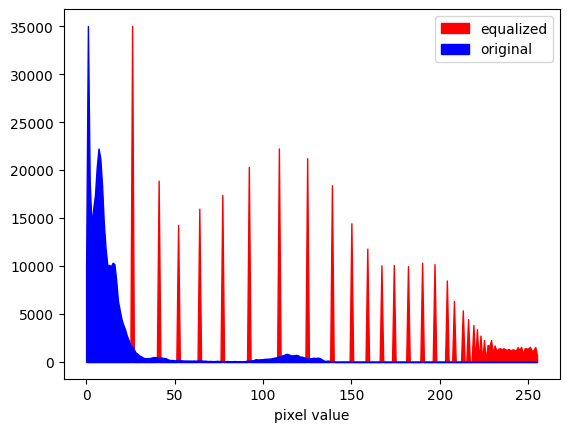

In [49]:
import cv2
import numpy as np
import matplotlib.pylab as plt

grey = cv2.imread('../data/i2992288637s.png', cv2.IMREAD_GRAYSCALE)
grey_eq = cv2.equalizeHist(grey)

cv2.imshow('equalized grey', np.hstack([grey,grey_eq]))
cv2.waitKey()
cv2.destroyAllWindows()

hist, _ = np.histogram(grey, 256, [0, 255])
hist1, _ = np.histogram(grey_eq, 256, [0, 255])
plt.fill_between(range(256), hist1, 0, color='r', label='equalized')
plt.fill_between(range(256), hist, 0, color='b', label='original')
plt.xlabel('pixel value')
plt.legend()
plt.show()

#### (8) RGB 공간에서 각 채널의 평활화

In [63]:
img = cv2.imread('../data/i2992288637s.png')

img_eq = np.zeros_like(img)

for i in range(3):
    img_eq[...,i] = cv2.equalizeHist(img[...,i])
cv2.imshow('original vs equalized', np.hstack([img,img_eq]))
cv2.waitKey()
cv2.destroyAllWindows()

#### (9) HSV 공간에서 V 채널의 히스토그램 평활화

In [64]:
#밝기만 문제이니까 V만 평활화
img = cv2.imread('../data/i2992288637s.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hsv[..., 2] = cv2.equalizeHist(hsv[..., 2])

img_eq = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

cv2.imshow('original vs equalized', np.hstack([img,img_eq]))
cv2.waitKey()
cv2.destroyAllWindows()

#### (10) YUV 공간에서 Y 채널의 히스토그램 평활화

In [65]:
img = cv2.imread('../data/i2992288637s.png')
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

yuv[..., 0] = cv2.equalizeHist(yuv[..., 0])

img_eq = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)

cv2.imshow('original vs equalized', np.hstack([img,img_eq]))
cv2.waitKey()
cv2.destroyAllWindows()

#### (11) CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [57]:
#부분영상에 대해 histogram equalize
img = cv2.imread('../data/i2992288637s.png')

# clipLimit의 default는 40이고 tileGridSize는 8X8
clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(16,16)) #girdsize를 키우면 비가오는 것을 알 수 있음

img[...,0] = clahe.apply(img[...,0])
img[...,1] = clahe.apply(img[...,1])
img[...,2] = clahe.apply(img[...,2])

cv2.imshow('clahe', img)
cv2.waitKey()
cv2.destroyAllWindows()

> Post filter

In [62]:
img = cv2.imread('../data/i2992288637s.png')

# clipLimit의 default는 40이고 tileGridSize는 8X8
clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(16,16))

img[...,0] = clahe.apply(img[...,0])
img[...,1] = clahe.apply(img[...,1])
img[...,2] = clahe.apply(img[...,2])

blur = cv2.medianBlur(img,5)
cv2.imshow('clahe', blur)
cv2.waitKey()
cv2.destroyAllWindows()

#### (12) 윤곽선 강조


In [83]:
#lpf와 hpf를 사용
img = cv2.imread('../data/sun.jpg',cv2.IMREAD_COLOR).astype(np.float32)/255
yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
y,u,v = cv2.split(yuv)

y = y - 0.5 * cv2.blur(y, (7,7))
y = cv2.normalize(y,None,0,1,cv2.NORM_MINMAX)

yuv = cv2.merge([y,u,v])
img_hpf = cv2.cvtColor(yuv,cv2.COLOR_YUV2BGR)

cv2.imshow('clahe', np.hstack([img,img_hpf]))
cv2.waitKey()
cv2.destroyAllWindows()



### 결론 컴퓨터 비전의 enhancement에는 정답이 없고 예술적인 영역이다...